In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

In [2]:
df = pd.read_csv(r"E:\kritsnam data\CWC-01.csv")
df.drop(columns = {'Timestamp', 'Flagged'}, inplace = True)
df.head()

,Water Level(In mm)
0,5645.0
1,5646.0
2,5642.0
3,5650.0
4,5650.0


In [ ]:
plt.plot(df['Water Level(In mm)'], 'b.', alpha = 0.5)

In [103]:
T = df.iloc[:, 0].values
def feature_extract(i):
    d_original = T[i]
    window_left = T[i-3:i]
    window_right = T[i:i+3]
    wt_right = np.arange(3, 0, -1)
    wt_left = np.arange(1, 4, 1)
    d_estimate = ((window_left*wt_left).sum() + (window_right*wt_right).sum())/(wt_left.sum()+wt_right.sum())
    pci_l = d_estimate - t.ppf(0.90, df = 2*3-1)*(np.sqrt(1+1/(2*3)))*np.std(np.hstack((window_left, window_right)))
    pci_r = d_estimate + t.ppf(0.90, df = 2*3-1)*(np.sqrt(1+1/(2*3)))*np.std(np.hstack((window_left, window_right)))
    state = 0
    if (d_original<pci_l) or (d_original>pci_r):
        state = 1    
    dat = [d_original, d_estimate, pci_l, pci_r, state]
    return dat
l = np.arange(3, len(T)-3, dtype = np.int64)

In [105]:
fin = map(feature_extract, l)
df2 = pd.DataFrame(list(fin), columns = ['Original', 'Estimated', 'Lower', 'Upper', 'Status'])

38.1 s ± 1.89 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [102]:
df2.head()

,Original,Estimated,Lower,Upper,Status
0,5650.0,5646.750000,5642.202128,5651.297872,0.0
1,5650.0,5647.333333,5641.993041,5652.673626,0.0
2,5648.0,5647.083333,5641.683885,5652.482782,0.0
3,5642.0,5645.666667,5638.672419,5652.660914,0.0
4,5645.0,5643.333333,5635.651276,5651.015390,0.0


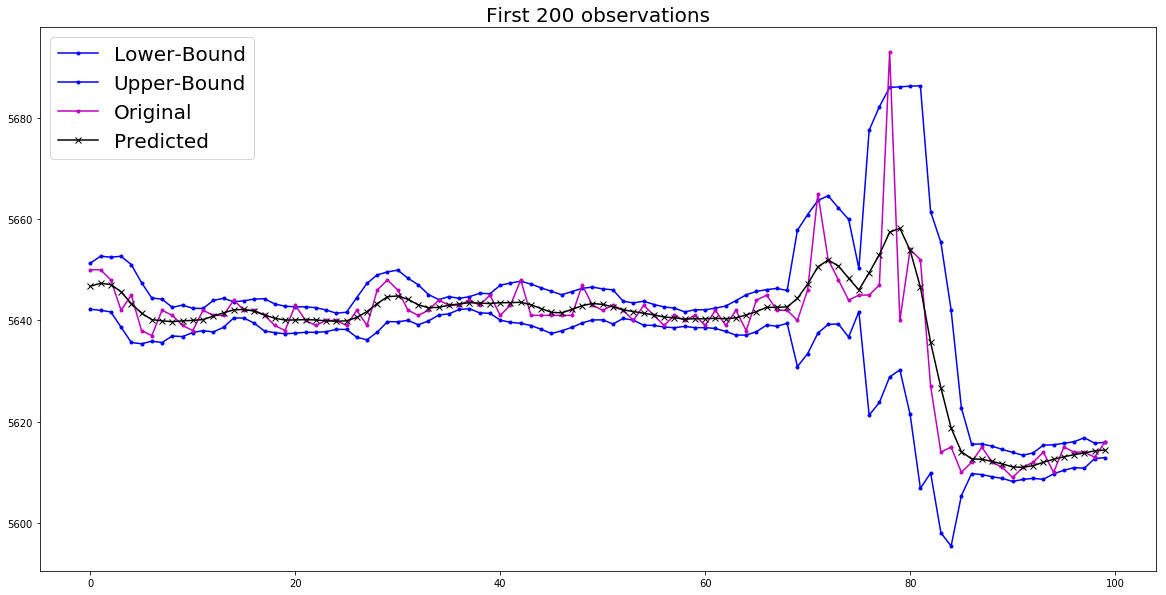

In [106]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax.plot(df2['Lower'].values[0:100], 'b.-', label = "Lower-Bound")
ax.plot(df2['Upper'].values[0:100], 'b.-', label = "Upper-Bound")
ax.plot(df2['Original'].values[0:100], 'm.-', label = "Original")
ax.plot(df2['Estimated'].values[0:100], 'k-x', label = "Predicted")
ax.set_title('First 200 observations', size = 20)
ax.legend(loc = "upper left", fontsize = 20)